# Exercise 5: Observation model


## 5.1 Implement model for perceiving landmarks

Consider a robot that operates in an environment populated by **range-only** sensors such as _beacons_.
These sensors transmit a signal that allows for obtaining noisy measurements of their distance from a receiver mounted on the robot.

The function `landmark_observation_model` realizes the observation model for perceiving landmarks with a range sensor. It takes as input:
 
- the observed noisy range $z$
- the standard deviation of the measurement $\sigma_z$ (zero-mean Gaussian noise)
- the position of the robot in the map $x$
- the position of the transmitting beacon in the map $b$

The output of this function is the probability $p(z | x, m)$ that the measurement $z$ was obtained at position $x$.

Implement the `landmark_observation_model` function and verify that it is correct for some test input. **[2.0]**

In [5]:
import ex5 as ex

p = ex.landmark_observation_model(z=10, x=[2, 2], b = [12, 8], sigma_r=1)
print(p)

0.10026880630755912


---

## 5.2 Compute likelihood of measurement in the environment

The robot operates in an environment that is represetend by a 20x20 grid map and contains a beacon at position $b_1 = [0,0]$ (top-left corner). 

The robot obtains a range measurement of the beacon $z_1 = 10$ and the sensor noise is $\sigma_{z1} = 1$.

Compute the `landmark_observation_model` at each cell of the environment and plot the likelihood of the observation over the environment. **[1.0]** 

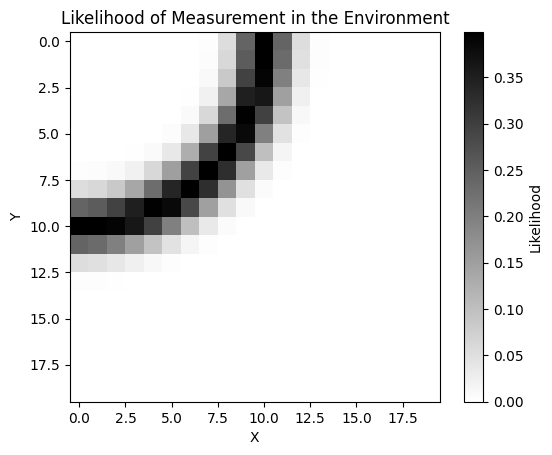

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ex5 as ex

grid_size = 20
gridmap = np.ones((grid_size, grid_size))

b1 = [0, 0]
z1 = 10
sigma_z1 = 1

likelihood_map = ex.observation_likelihood(z1, b1, gridmap, sigma_z1, grid_size)

plt.imshow(likelihood_map, cmap="binary", origin="upper")
plt.colorbar(label="Likelihood")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Likelihood of Measurement in the Environment")
plt.show()

---

## 5.3 Multiple landmarks

Assume that we install two **additional** beacons in our environment:

- $b_2 = [0, 10]$
- $b_3 = [10, 0]$

from which we obtain the following observations:

- $z_2 = 5$ with $\sigma_{z2} = 3$
- $z_3 = 9$ with $\sigma_{z3} = 2$

Compute the `landmark_observation_model` at each cell of the environment considering the measurements from **all** beacons and plot the **joint** likelihood of the observations over the environment. **[2.0]** 

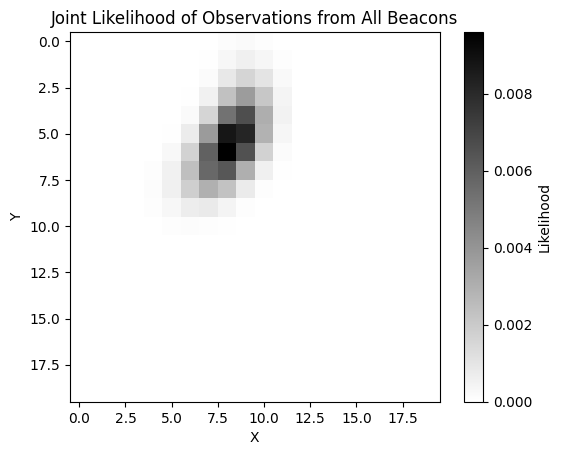

In [7]:
import ex5 as ex
import numpy as np
import matplotlib.pyplot as plt

grid_size = 20
gridmap = np.ones((grid_size, grid_size))

beacons = [[0, 0], [0, 10], [10, 0]]
measurements = [10, 5, 9]
sigmas = [1, 3, 2]

for beacon, measurement, sigma in zip(beacons, measurements, sigmas):
    gridmap = ex.observation_likelihood(measurement, beacon, gridmap, sigma, grid_size)

# Plot the likelihood map
plt.imshow(gridmap, cmap="binary", origin="upper")
plt.colorbar(label="Likelihood")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Joint Likelihood of Observations from All Beacons")
plt.show()